In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [13]:
df = pd.read_csv("Bank-additional/bank-additional-full.csv")
df.rename(columns={'y':'deposit'}, inplace=True)

In [14]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.0,1.000,93.0,994.000,36,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.0,1.000,93.0,994.000,36,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.0,1.000,93.0,994.000,36,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.0,1.000,93.0,994.000,36,no


In [15]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
19994,50,blue-collar,married,basic.9y,no,yes,no,cellular,aug,fri,...,4,999,0,nonexistent,1.0,4.0,93.0,444.0,36,no
19995,44,technician,married,high.school,no,yes,yes,cellular,aug,fri,...,2,999,0,nonexistent,1.0,4.0,93.0,444.0,36,no
19996,43,admin.,married,university.degree,unknown,yes,no,cellular,aug,fri,...,3,999,0,nonexistent,1.0,4.0,93.0,444.0,36,no
19997,40,management,married,university.degree,no,no,no,cellular,aug,fri,...,3,999,0,nonexistent,1.0,4.0,93.0,444.0,36,no
19998,33,technician,married,professional.course,no,no,no,cellular,aug,fri,...,7,999,0,nonexistent,1.0,4.0,93.0,444.0,36,yes


In [16]:
df.shape

(19999, 21)

In [17]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [18]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed         int64
deposit            object
dtype: object

In [19]:
df.dtypes.value_counts()

object     11
int64       6
float64     4
Name: count, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             19999 non-null  int64  
 1   job             19999 non-null  object 
 2   marital         19999 non-null  object 
 3   education       19999 non-null  object 
 4   default         19999 non-null  object 
 5   housing         19999 non-null  object 
 6   loan            19999 non-null  object 
 7   contact         19999 non-null  object 
 8   month           19999 non-null  object 
 9   day_of_week     19999 non-null  object 
 10  duration        19999 non-null  int64  
 11  campaign        19999 non-null  int64  
 12  pdays           19999 non-null  int64  
 13  previous        19999 non-null  int64  
 14  poutcome        19999 non-null  object 
 15  emp.var.rate    19999 non-null  float64
 16  cons.price.idx  19999 non-null  float64
 17  cons.conf.idx   19999 non-null 

In [21]:
df.duplicated().sum()

5

In [23]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

In [24]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

num_cols = df.select_dtypes(exclude='object').columns
print(num_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'deposit'],
      dtype='object')
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [25]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,19999.000000,19999.000000,19999.000000,19999.0,19999.0,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000
mean,39.942797,260.793090,2.903495,999.0,0.0,1.000005,2.840142,93.212241,820.479067,39.356918
std,9.307233,262.160633,3.392026,0.0,0.0,0.000707,1.597779,1.005473,225.565909,36.538568
min,19.000000,0.000000,1.000000,999.0,0.0,1.000000,1.000000,-36.400000,4.857000,36.000000
25%,32.000000,104.000000,1.000000,999.0,0.0,1.000000,1.000000,93.000000,465.000000,36.000000
50%,39.000000,180.000000,2.000000,999.0,0.0,1.000000,4.000000,93.000000,918.000000,41.000000
75%,47.000000,320.000000,3.000000,999.0,0.0,1.000000,4.000000,93.000000,994.000000,42.000000
max,61.000000,3643.000000,56.000000,999.0,0.0,1.100000,93.994000,94.000000,994.000000,5191.000000


In [26]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,deposit
count,19999,19999,19999,19999,19999,19999,19999,19999,19999,19999,19999
unique,12,4,8,2,3,3,2,4,5,1,2
top,blue-collar,married,high.school,no,no,no,telephone,may,wed,nonexistent,no
freq,5524,12653,4830,14130,9906,16472,13145,7763,4127,19999,19086


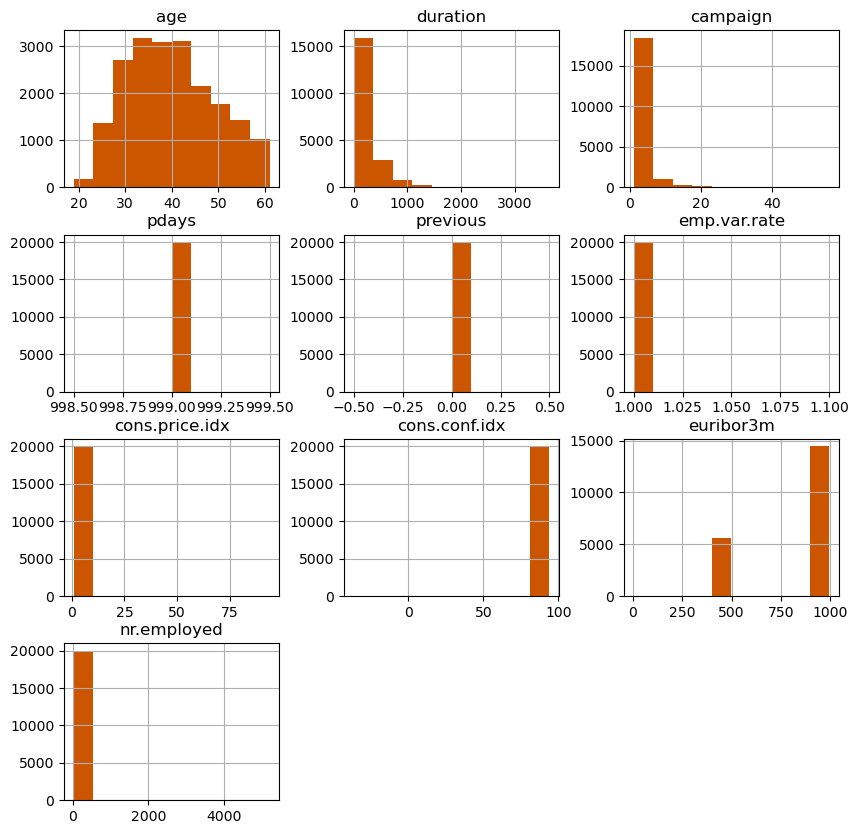

In [27]:
df.hist(figsize=(10,10),color='#cc5500')
plt.show()

C:\Users\talka\AppData\Local\Temp\ipykernel_3740\4219567709.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x=feature, data=df, palette='Wistia')


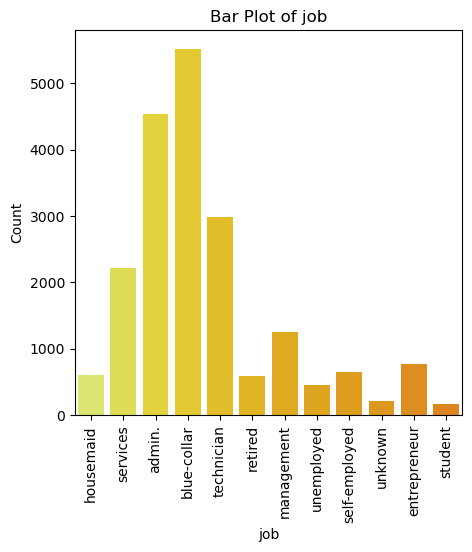

C:\Users\talka\AppData\Local\Temp\ipykernel_3740\4219567709.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x=feature, data=df, palette='Wistia')


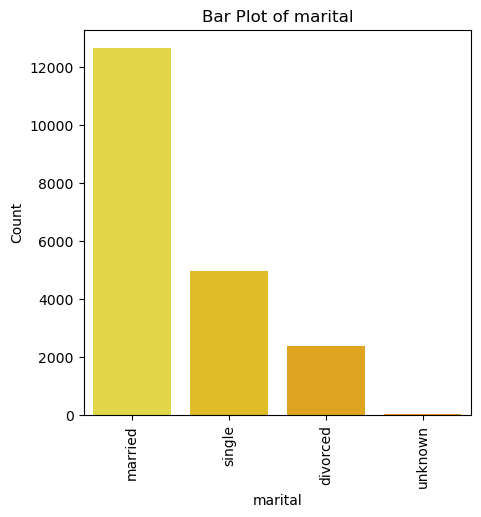

C:\Users\talka\AppData\Local\Temp\ipykernel_3740\4219567709.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x=feature, data=df, palette='Wistia')


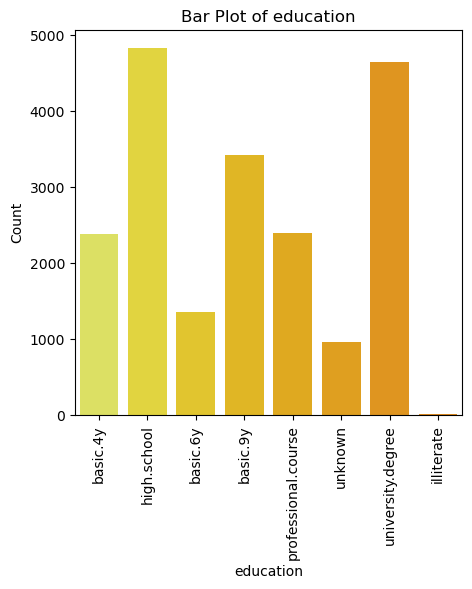

C:\Users\talka\AppData\Local\Temp\ipykernel_3740\4219567709.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x=feature, data=df, palette='Wistia')


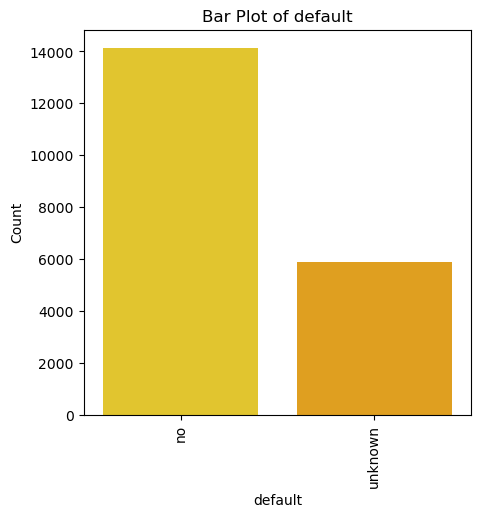

C:\Users\talka\AppData\Local\Temp\ipykernel_3740\4219567709.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x=feature, data=df, palette='Wistia')


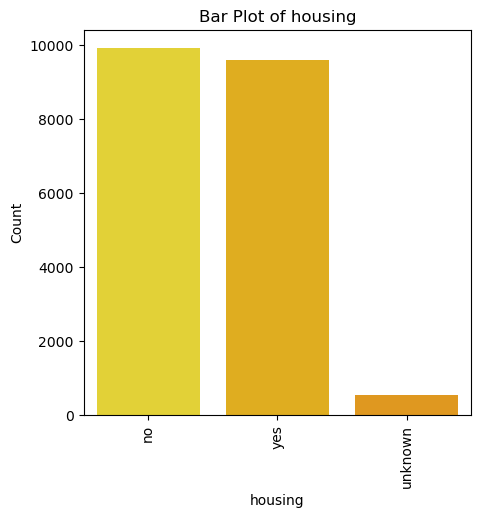

C:\Users\talka\AppData\Local\Temp\ipykernel_3740\4219567709.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x=feature, data=df, palette='Wistia')


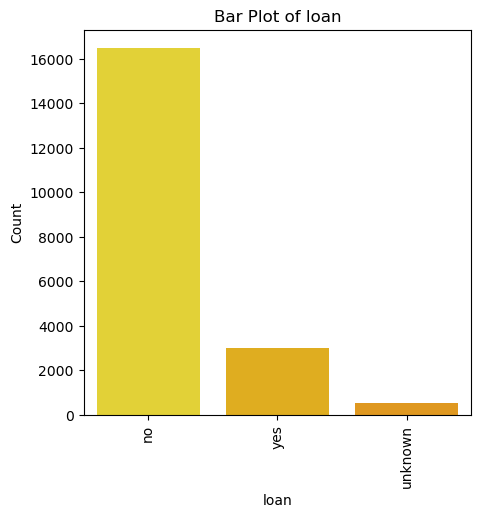

C:\Users\talka\AppData\Local\Temp\ipykernel_3740\4219567709.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x=feature, data=df, palette='Wistia')


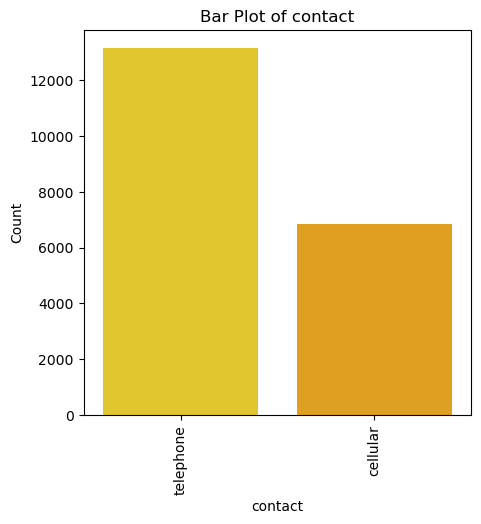

C:\Users\talka\AppData\Local\Temp\ipykernel_3740\4219567709.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x=feature, data=df, palette='Wistia')


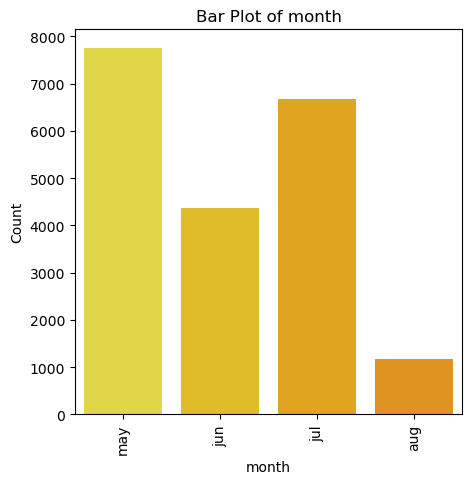

C:\Users\talka\AppData\Local\Temp\ipykernel_3740\4219567709.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x=feature, data=df, palette='Wistia')


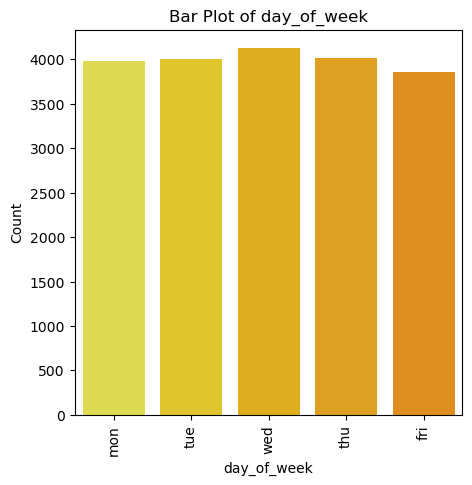

C:\Users\talka\AppData\Local\Temp\ipykernel_3740\4219567709.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x=feature, data=df, palette='Wistia')


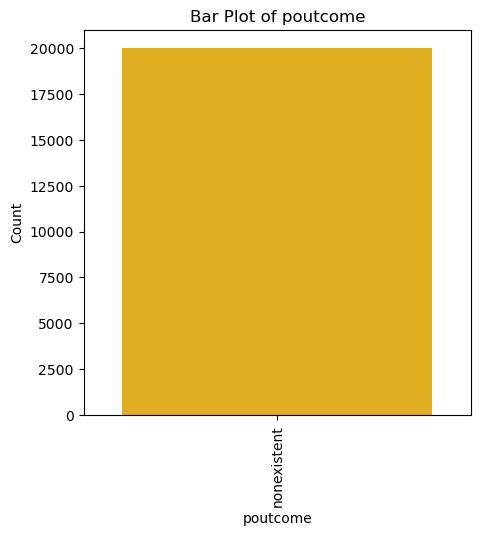

C:\Users\talka\AppData\Local\Temp\ipykernel_3740\4219567709.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x=feature, data=df, palette='Wistia')


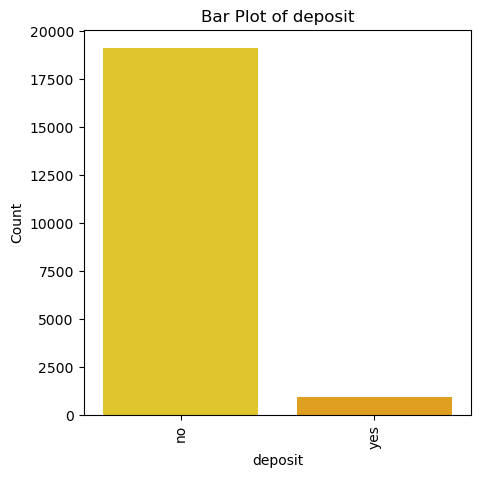

In [29]:
for feature in cat_cols:
    plt.figure(figsize=(5,5)) 
    sb.countplot(x=feature, data=df, palette='Wistia')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

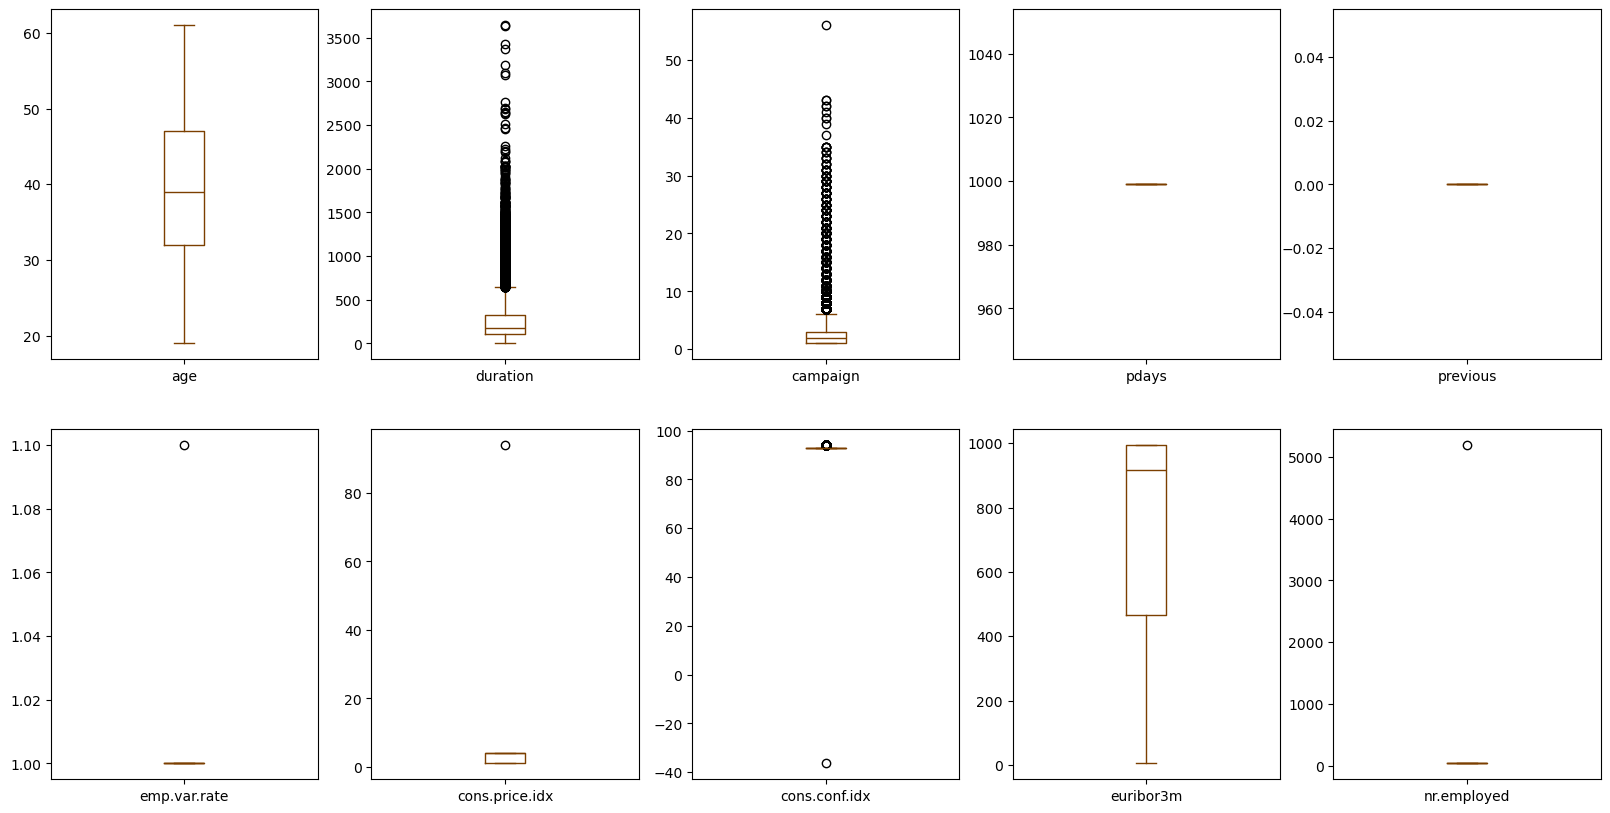

In [30]:
df.plot(kind='box', subplots=True, layout=(2,5),figsize=(20,10),color='#7b3f00')
plt.show()

In [31]:
column = df[['age','campaign','duration']]
q1 = np.percentile(column, 25)
q3 = np.percentile(column, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df[['age','campaign','duration']] = column[(column > lower_bound) & (column < upper_bound)]

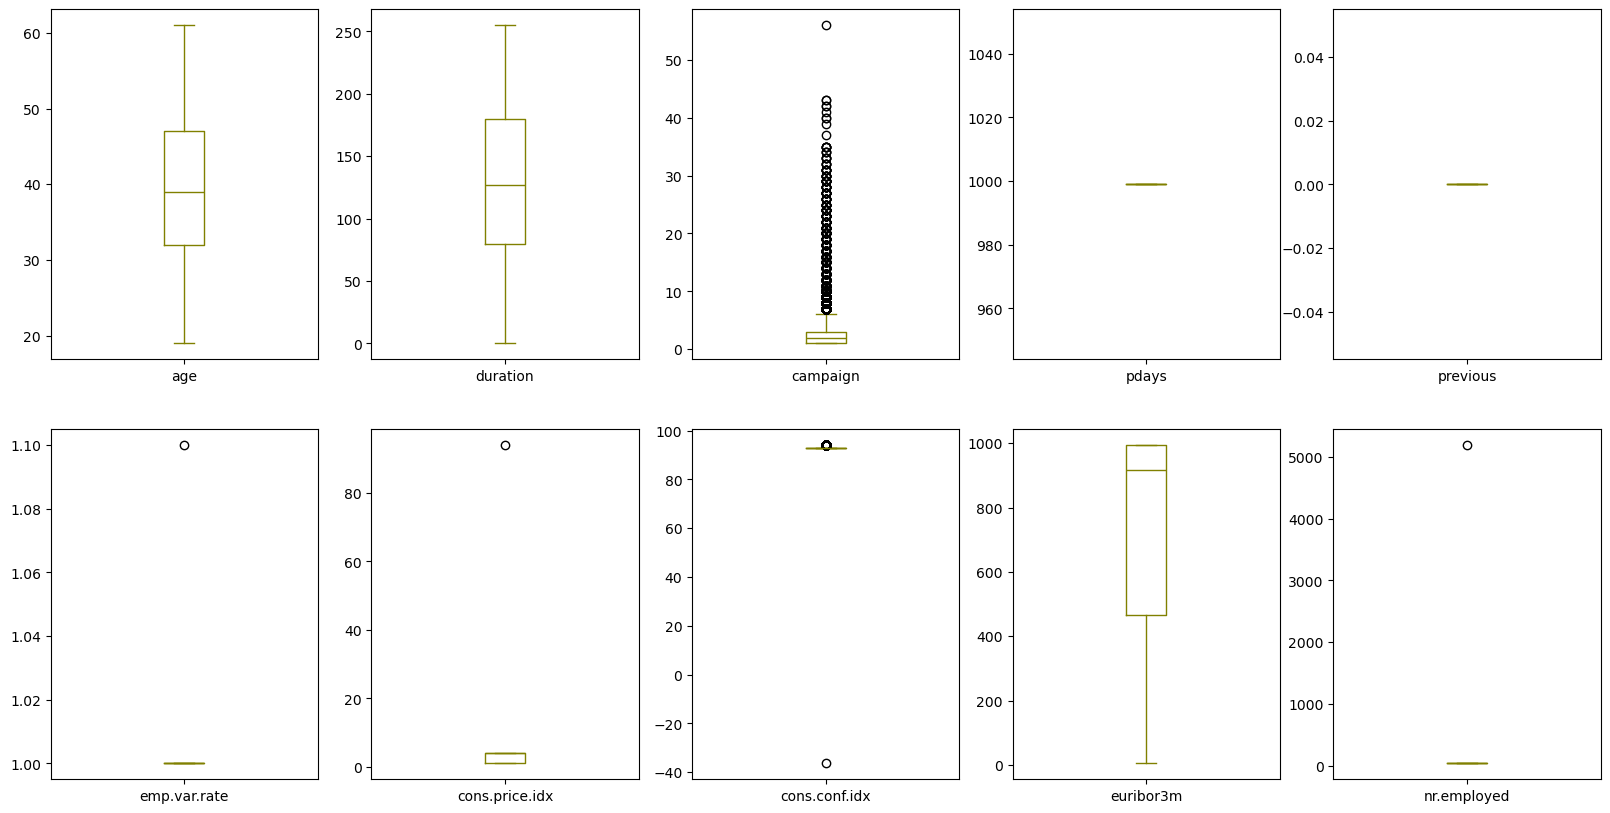

In [32]:
df.plot(kind='box', subplots=True, layout=(2,5),figsize=(20,10),color='#808000')
plt.show()

                     age  duration  campaign  pdays  previous  emp.var.rate  \
age             1.000000 -0.021873  0.005337    NaN       NaN      0.012200   
duration       -0.021873  1.000000 -0.214392    NaN       NaN           NaN   
campaign        0.005337 -0.214392  1.000000    NaN       NaN     -0.003968   
pdays                NaN       NaN       NaN    NaN       NaN           NaN   
previous             NaN       NaN       NaN    NaN       NaN           NaN   
emp.var.rate    0.012200       NaN -0.003968    NaN       NaN      1.000000   
cons.price.idx -0.025112 -0.114279  0.082370    NaN       NaN      0.403437   
cons.conf.idx  -0.003231 -0.112033  0.032716    NaN       NaN     -0.911577   
euribor3m      -0.042404  0.100611 -0.037434    NaN       NaN     -0.025570   
nr.employed     0.006855 -0.113440  0.005422    NaN       NaN      0.997038   

                cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
age                  -0.025112      -0.003231  -0.042404  

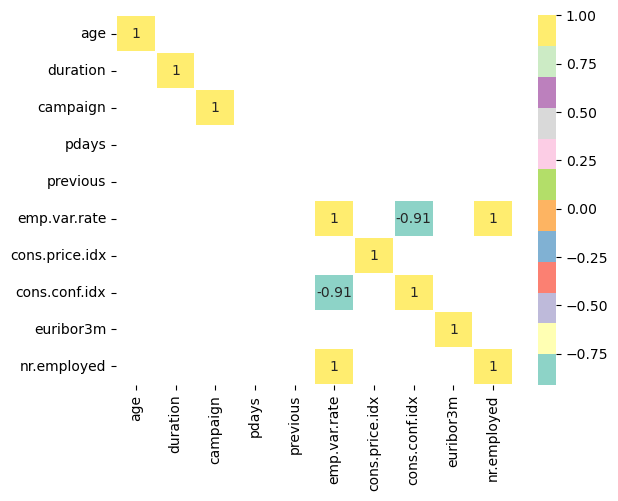

In [38]:
corr = df.corr(numeric_only=True)
print(corr)
corr = corr[abs(corr)>=0.90]
sb.heatmap(corr,annot=True,cmap='Set3',linewidths=0.2)
plt.show()

In [39]:
high_corr_cols = ['emp.var.rate','euribor3m','nr.employed']

In [40]:
df1 = df.copy()
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [41]:
df1.drop(high_corr_cols,inplace=True,axis=1)  # axis=1 indicates columns
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'deposit'],
      dtype='object')

In [42]:
df1.shape

(19999, 18)

In [43]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_encoded = df1.apply(lb.fit_transform)
df_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,deposit
0,37,3,1,0,0,0,0,1,3,1,254,0,0,0,0,2,0,0
1,38,7,1,3,1,0,0,1,3,1,147,0,0,0,0,0,1,0
2,18,7,1,3,0,2,0,1,3,1,224,0,0,0,0,0,1,0
3,21,0,1,1,0,0,0,1,3,1,149,0,0,0,0,0,1,0
4,37,7,1,3,0,0,2,1,3,1,254,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,31,1,1,2,0,2,0,0,0,0,254,3,0,0,0,1,1,0
19995,25,9,1,3,0,2,2,0,0,0,254,1,0,0,0,1,1,0
19996,24,0,1,6,1,2,0,0,0,0,207,2,0,0,0,1,1,0
19997,21,4,1,6,0,0,0,0,0,0,229,2,0,0,0,1,1,0


In [44]:
df_encoded['deposit'].value_counts()

deposit
0    19086
1      913
Name: count, dtype: int64

In [45]:
x = df_encoded.drop('deposit',axis=1) 
y = df_encoded['deposit']             
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(19999, 17)
(19999,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [48]:
from sklearn.model_selection import train_test_split
print(4119*0.25)

1029.75


In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14999, 17)
(5000, 17)
(14999,)
(5000,)


In [50]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

def eval_model(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

def mscore(model):
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print('Training Score',train_score)  
    print('Testing Score',test_score)

In [52]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [53]:
mscore(dt)

Training Score 0.954263617574505
Testing Score 0.955


In [54]:
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[0 0 0 ... 0 0 0]


In [55]:
eval_model(y_test,ypred_dt)

Accuracy_Score 0.955
Confusion Matrix
 [[4774    1]
 [ 224    1]]
Classification Report
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      4775
           1       0.50      0.00      0.01       225

    accuracy                           0.95      5000
   macro avg       0.73      0.50      0.49      5000
weighted avg       0.93      0.95      0.93      5000



In [56]:
from sklearn.tree import plot_tree

In [57]:
cn = ['no','yes']
fn = x_train.columns
print(fn)
print(cn)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx'],
      dtype='object')
['no', 'yes']


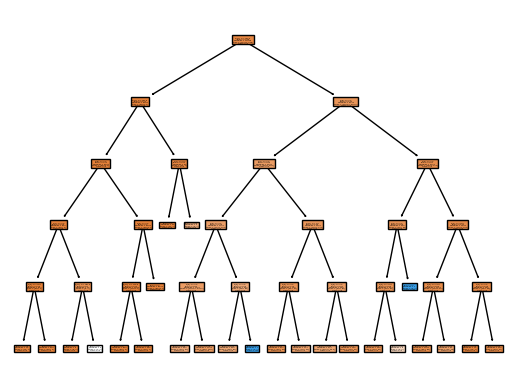

In [58]:
plot_tree(dt,class_names=cn,filled=True)
plt.show()

In [59]:
dt1 = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [60]:
mscore(dt1)

Training Score 0.9541969464630975
Testing Score 0.9548


In [61]:
ypred_dt1 = dt1.predict(x_test)

In [62]:
eval_model(y_test,ypred_dt1)

Accuracy_Score 0.9548
Confusion Matrix
 [[4774    1]
 [ 225    0]]
Classification Report
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      4775
           1       0.00      0.00      0.00       225

    accuracy                           0.95      5000
   macro avg       0.48      0.50      0.49      5000
weighted avg       0.91      0.95      0.93      5000



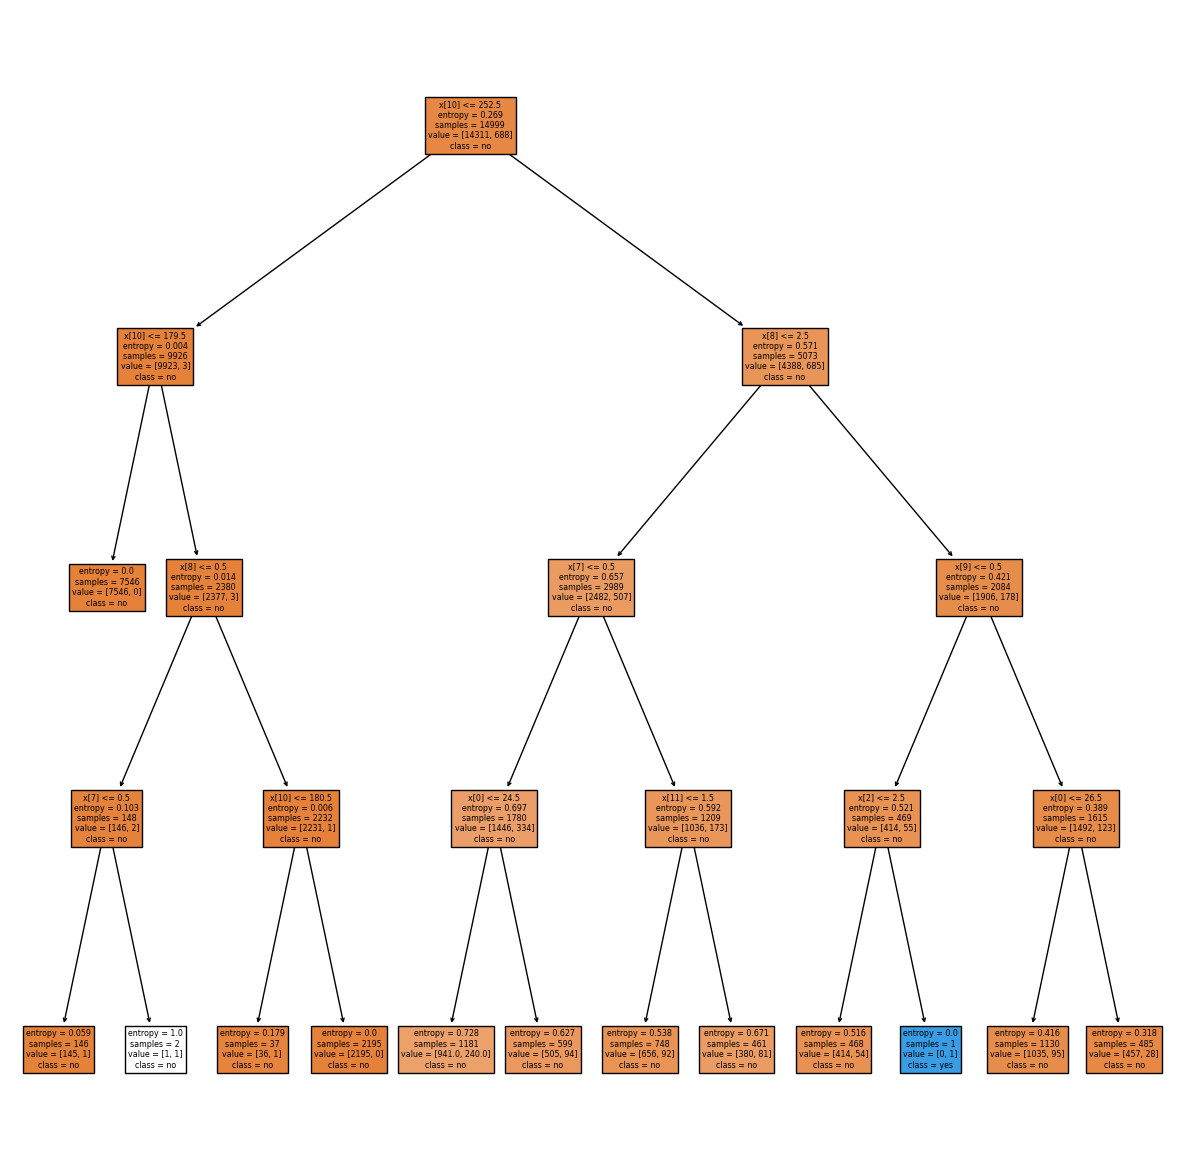

In [63]:
plt.figure(figsize=(15,15))
plot_tree(dt1,class_names=cn,filled=True)
plt.show()